In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"whysoserious143","key":"350e02704f3348901edd1715b54494c6"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle dataset list

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [10]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [01:04<00:00, 30.4MB/s]
100% 2.13G/2.13G [01:04<00:00, 35.5MB/s]


In [11]:
!unzip leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/leapGestRecog'):
    pass

In [2]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
from keras.layers import MaxPooling2D

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout


In [3]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "/content/leapGestRecog"

In [4]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 3, 3, ..., 3, 3, 4],
        [5, 4, 4, ..., 4, 4, 2],
        [4, 4, 4, ..., 4, 4, 3],
        ...,
        [4, 4, 4, ..., 4, 4, 3],
        [3, 5, 5, ..., 4, 3, 4],
        [3, 4, 5, ..., 4, 4, 4]], dtype=uint8),
 0]

In [5]:
import random
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

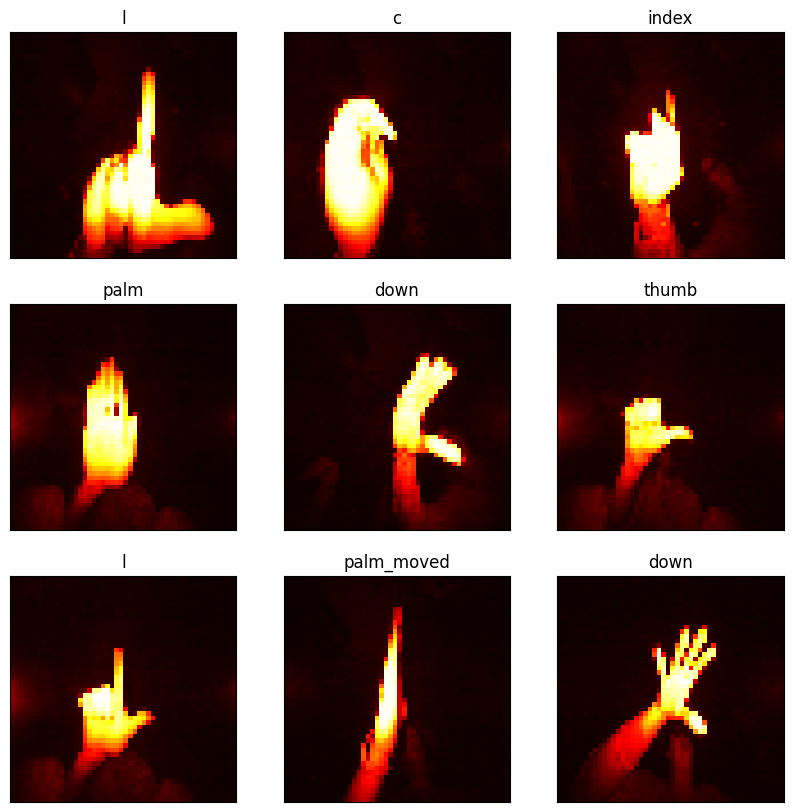

In [7]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [9]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [10]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add max pooling layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 116s 256ms/step - loss: 0.1451 - accuracy: 0.9682 - val_loss: 3.4459 - val_accuracy: 0.2123
Epoch 2/7
438/438 [==============================] - 104s 238ms/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 3/7
438/438 [==============================] - 104s 237ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 4/7
438/438 [==============================] - 97s 222ms/step - loss: 7.2503e-04 - accuracy: 1.0000 - val_loss: 3.6845e-04 - val_accuracy: 1.0000
Epoch 5/7
438/438 [==============================] - 94s 214ms/step - loss: 4.5708e-04 - accuracy: 1.0000 - val_loss: 3.3980e-04 - val_accuracy: 1.0000
Epoch 6/7
438/438 [==============================] - 97s 223ms/step - loss: 0.0240 - accuracy: 0.9945 - val_loss: 0.0029 - val_accuracy: 0.9998
Epoch 7/7
438/438 [==============================] - 101s 230ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 9s 48ms/step - loss: 0.0189 - accuracy: 0.9983
Test accuracy: 99.83%


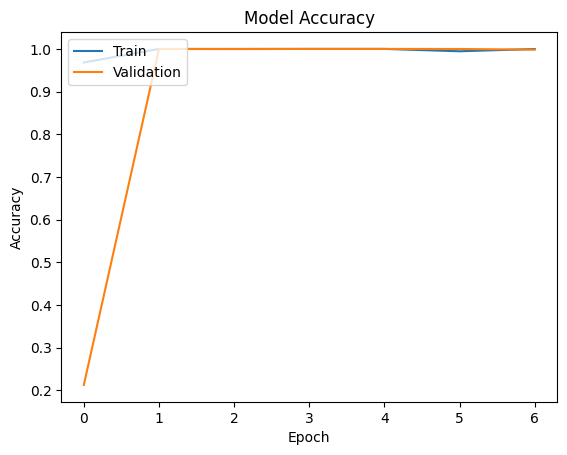

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()